In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I have Imported the data into the pandas by using read_csv, here i have my dataset into csv format
logistic_data=pd.read_csv("logistics_cost_data.csv")
logistic_data


,Month,Region,Route,Vendor,Package_Count,Driver_Hours,Mileage,Fuel_Used,Delivery_Cost
0,2023-01,North,1,Vendor B,199,51.444737,269.502297,51.732150,1644.292569
1,2023-01,North,2,Vendor G,213,75.901224,225.084631,47.989593,2116.544028
2,2023-01,North,3,Vendor D,207,57.952974,279.451740,52.530174,1794.821040
3,2023-01,North,4,Vendor G,195,80.282633,218.654911,58.919613,2206.104437
4,2023-01,North,5,Vendor F,194,83.177555,213.682364,52.350546,2911.755806
...,...,...,...,...,...,...,...,...,...
1005,2023-06,North,1,Vendor B,214,80.566583,265.835161,51.410402,2246.063959
1006,2023-12,Central,6,Vendor B,205,71.405929,263.692236,47.261936,2035.619719
1007,2023-01,Southeast,8,Vendor C,204,67.797802,265.563157,45.412375,1957.531062
1008,2023-11,North,4,Vendor C,216,76.514843,299.781171,42.870562,2162.777239


In [3]:
#By usingshape function to determine how many rows and columns are there in the data set
logistic_data.shape

(1010, 9)

In [4]:
# By using columns function to list the name's of a columns
logistic_data.columns

Index(['Month', 'Region', 'Route', 'Vendor', 'Package_Count', 'Driver_Hours',
       'Mileage', 'Fuel_Used', 'Delivery_Cost'],
      dtype='object')

In [5]:
#  info fucntion states to  Check data types and non-null counts
logistic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1010 non-null   object 
 1   Region         1010 non-null   object 
 2   Route          1010 non-null   int64  
 3   Vendor         1010 non-null   object 
 4   Package_Count  1010 non-null   int64  
 5   Driver_Hours   1000 non-null   float64
 6   Mileage        1000 non-null   float64
 7   Fuel_Used      990 non-null    float64
 8   Delivery_Cost  1010 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 71.1+ KB


In [6]:
# isnull() states that in column we have null values 
#  sum()states counts how many null values are there
logistic_data.isnull().sum()

Month             0
Region            0
Route             0
Vendor            0
Package_Count     0
Driver_Hours     10
Mileage          10
Fuel_Used        20
Delivery_Cost     0
dtype: int64

As per the above results we can see that we have the missing values in Briver_hours, Milage and fuel used. So as all three of them are numerical i am selecting to handle these missing values by replacing with the median as of now. but later i will use the more advanced handling techniques using machine learning models like Regression Imputation.

In [7]:
# Impute missing values using median within each region
logistic_data['Driver_Hours']=logistic_data.groupby('Region')['Driver_Hours'].transform(lambda x:x.fillna(x.median()))
logistic_data['Driver_Hours']


0       51.444737
1       75.901224
2       57.952974
3       80.282633
4       83.177555
          ...    
1005    80.566583
1006    71.405929
1007    67.797802
1008    76.514843
1009    91.006957
Name: Driver_Hours, Length: 1010, dtype: float64

In [8]:
# Impute missing values using median within each region
logistic_data['Mileage']=logistic_data.groupby('Region')['Mileage'].transform(lambda x:x.fillna(x.median()))
logistic_data['Mileage']

0       269.502297
1       225.084631
2       279.451740
3       218.654911
4       213.682364
           ...    
1005    265.835161
1006    263.692236
1007    265.563157
1008    299.781171
1009    212.043639
Name: Mileage, Length: 1010, dtype: float64

In [9]:
# Impute missing values using median within each region
logistic_data['Fuel_Used']=logistic_data.groupby('Region')['Fuel_Used'].transform(lambda x:x.fillna(x.median()))
logistic_data['Fuel_Used']

0       51.732150
1       47.989593
2       52.530174
3       58.919613
4       52.350546
          ...    
1005    51.410402
1006    47.261936
1007    45.412375
1008    42.870562
1009    59.428943
Name: Fuel_Used, Length: 1010, dtype: float64

In [10]:
# here we are checking whether there is any missing value
logistic_data[['Driver_Hours','Mileage','Fuel_Used']].isnull().sum()

Driver_Hours    0
Mileage         0
Fuel_Used       0
dtype: int64

## Feature Engineering 

In [11]:
logistic_data['Month'] = pd.to_datetime(logistic_data['Month'])


In [12]:
# Time based features
# step 1: Extracted only year 
logistic_data['Year'] = logistic_data['Month'].dt.year
logistic_data['Year']

0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
1005    2023
1006    2023
1007    2023
1008    2023
1009    2023
Name: Year, Length: 1010, dtype: int32

In [13]:
# Step 2: Extract the numeric month (1 to 12) from the 'Month' column and store it in a new 'Month_Num' column 
logistic_data['Month_Num'] = logistic_data['Month'].dt.month
logistic_data['Month_Num']



0        1
1        1
2        1
3        1
4        1
        ..
1005     6
1006    12
1007     1
1008    11
1009    10
Name: Month_Num, Length: 1010, dtype: int32

In [14]:
# Step 3: Extract the quarter (1 to 4) from the 'Month' column and store it in a new 'Quarter' column
logistic_data['Quarter'] = logistic_data['Month'].dt.quarter
logistic_data['Quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1005    2
1006    4
1007    1
1008    4
1009    4
Name: Quarter, Length: 1010, dtype: int32

In [15]:
## Efficiency Metrics
# Step 1: Fuel Efficiency adding a new column by using mileage and fuel_used
logistic_data['Fuel_Efficiency'] = logistic_data['Mileage']/logistic_data['Fuel_Used']
logistic_data['Fuel_Efficiency']

0       5.209571
1       4.690280
2       5.319833
3       3.711072
4       4.081760
          ...   
1005    5.170844
1006    5.579379
1007    5.847815
1008    6.992705
1009    3.568020
Name: Fuel_Efficiency, Length: 1010, dtype: float64

In [16]:
# Step 2: Cost per package is a new column added in a dataset by using Delivery_cost and package_count
logistic_data['Cost_Per_Package']=logistic_data['Delivery_Cost']/logistic_data['Package_Count']
logistic_data['Cost_Per_Package']

0        8.262777
1        9.936826
2        8.670633
3       11.313356
4       15.009051
          ...    
1005    10.495626
1006     9.929852
1007     9.595740
1008    10.012858
1009    11.971193
Name: Cost_Per_Package, Length: 1010, dtype: float64

In [17]:
# Step 3 Packages_Per_Hour is a new column added in a dataset by using Delivery_cost and Mileage
logistic_data['Packages_per_hour']=logistic_data['Package_Count']/logistic_data['Driver_Hours']
logistic_data['Packages_per_hour']

0       3.868229
1       2.806279
2       3.571862
3       2.428919
4       2.332360
          ...   
1005    2.656188
1006    2.870910
1007    3.008947
1008    2.822982
1009    2.230599
Name: Packages_per_hour, Length: 1010, dtype: float64

In [18]:
logistic_data.columns

Index(['Month', 'Region', 'Route', 'Vendor', 'Package_Count', 'Driver_Hours',
       'Mileage', 'Fuel_Used', 'Delivery_Cost', 'Year', 'Month_Num', 'Quarter',
       'Fuel_Efficiency', 'Cost_Per_Package', 'Packages_per_hour'],
      dtype='object')

In [19]:
# describe() function states the summary statistics for a numerical columns

logistic_data.describe()

,Month,Route,Package_Count,Driver_Hours,Mileage,Fuel_Used,Delivery_Cost,Year,Month_Num,Quarter,Fuel_Efficiency,Cost_Per_Package,Packages_per_hour
count,1010,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.0,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,2023-06-17 11:05:49.306930688,5.544554,200.319802,74.891092,250.004856,49.944107,2200.851009,2023.0,6.531683,2.509901,5.059043,11.037202,2.725619
min,2023-01-01 00:00:00,1.000000,162.000000,38.033781,168.458644,30.816722,1358.521397,2023.0,1.000000,1.000000,2.819824,6.595718,1.741107
25%,2023-04-01 00:00:00,3.000000,191.000000,68.198724,229.319460,46.656514,1985.269511,2023.0,4.000000,2.000000,4.470625,9.887086,2.431315
50%,2023-07-01 00:00:00,6.000000,201.000000,74.849829,248.649489,49.868828,2146.692092,2023.0,7.000000,3.000000,5.003385,10.690712,2.675192
75%,2023-10-01 00:00:00,8.000000,210.000000,81.665568,271.049910,53.251464,2330.003109,2023.0,10.000000,4.000000,5.541654,11.871331,2.968232
max,2023-12-01 00:00:00,10.000000,240.000000,106.555379,335.016767,64.908967,3734.743975,2023.0,12.000000,4.000000,8.883120,20.981708,5.225130
std,NaN,2.868526,13.924250,9.928320,29.573678,4.899575,323.566961,0.0,3.459447,1.121199,0.819932,1.796716,0.435412


Visualization by Doing Matplotlib and Seaborn
 

In [20]:
# Using Matplotlib and seaborn doing vizualization
sns.set(style='whitegrid')

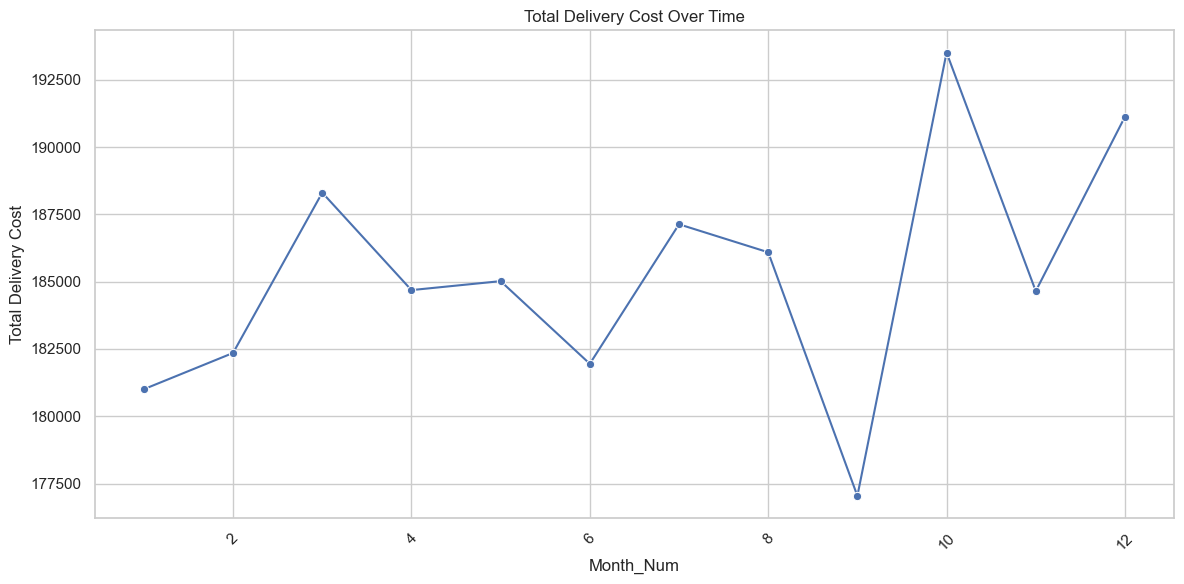

In [21]:
# 1. Total Delivery Cost Over Time
plt.figure(figsize=(12, 6))
monthly_cost = logistic_data.groupby('Month_Num')['Delivery_Cost'].sum().reset_index()
sns.lineplot(data=monthly_cost, x='Month_Num', y='Delivery_Cost', marker='o')
plt.title('Total Delivery Cost Over Time')
plt.xlabel('Month_Num')
plt.ylabel('Total Delivery Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
logistic_data.columns

Index(['Month', 'Region', 'Route', 'Vendor', 'Package_Count', 'Driver_Hours',
       'Mileage', 'Fuel_Used', 'Delivery_Cost', 'Year', 'Month_Num', 'Quarter',
       'Fuel_Efficiency', 'Cost_Per_Package', 'Packages_per_hour'],
      dtype='object')

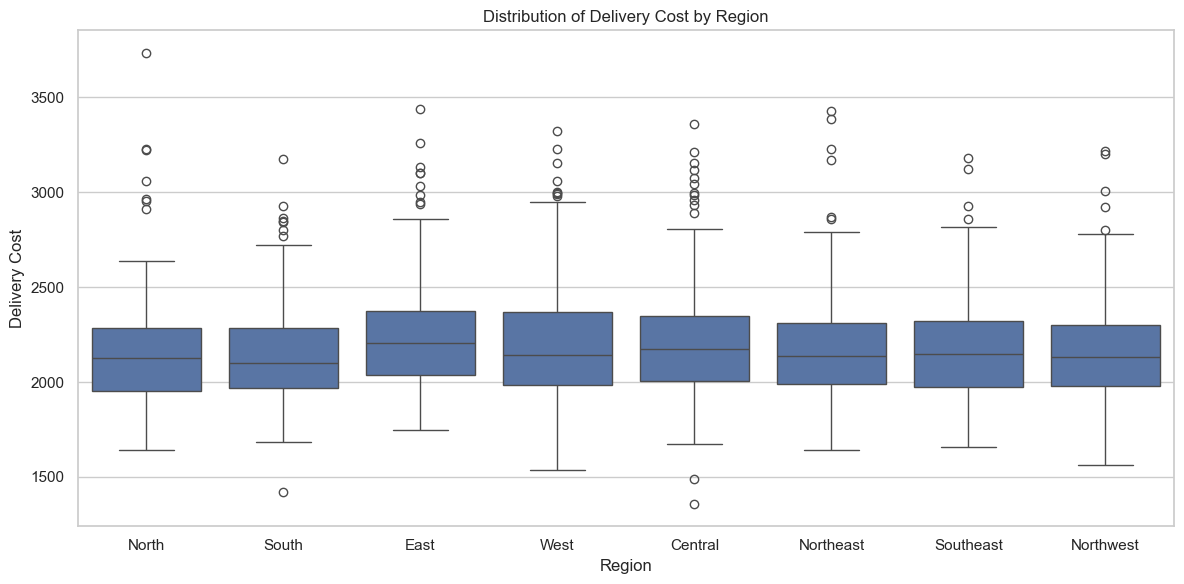

In [23]:
# 2. Box Plot – Distribution of Delivery Cost by Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=logistic_data, x='Region', y='Delivery_Cost')
plt.title("Distribution of Delivery Cost by Region")
plt.ylabel("Delivery Cost")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [24]:
logistic_data.columns = logistic_data.columns.str.strip()
logistic_data.columns 

Index(['Month', 'Region', 'Route', 'Vendor', 'Package_Count', 'Driver_Hours',
       'Mileage', 'Fuel_Used', 'Delivery_Cost', 'Year', 'Month_Num', 'Quarter',
       'Fuel_Efficiency', 'Cost_Per_Package', 'Packages_per_hour'],
      dtype='object')

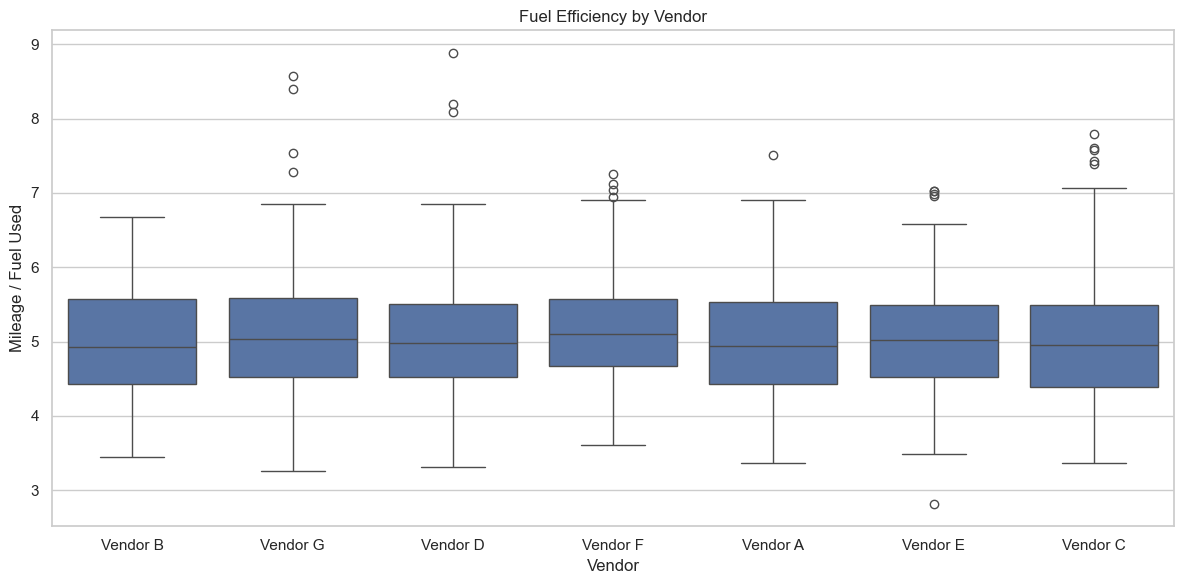

In [25]:
# 3. Fuel Efficiency by Vendor
plt.figure(figsize=(12, 6))
sns.boxplot(data=logistic_data, x='Vendor', y='Fuel_Efficiency')
plt.title('Fuel Efficiency by Vendor')
plt.ylabel('Mileage / Fuel Used')
plt.xlabel('Vendor')
plt.tight_layout()
plt.show()

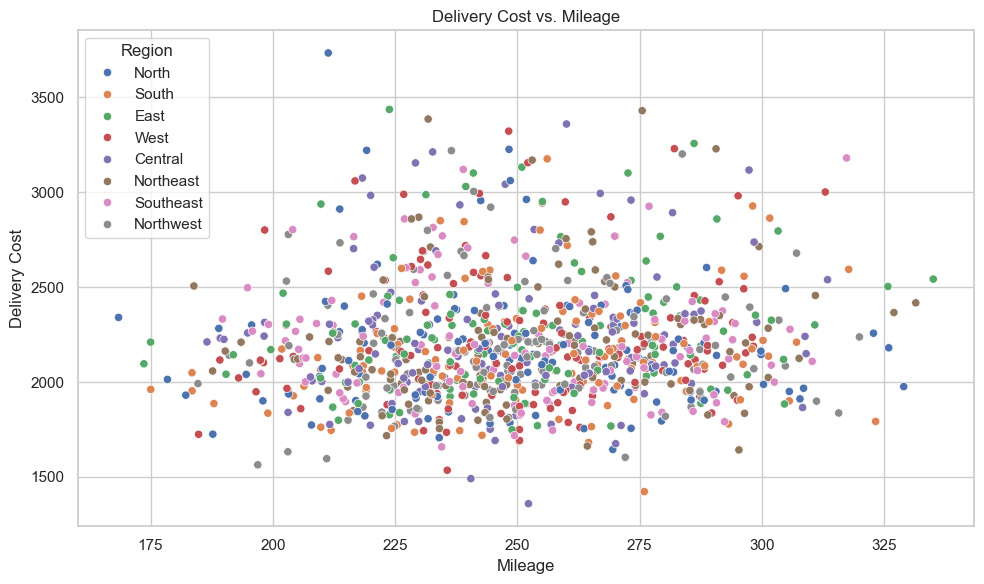

In [26]:

# 4. Delivery Cost vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=logistic_data, x='Mileage', y='Delivery_Cost', hue='Region')
plt.title('Delivery Cost vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Delivery Cost')
plt.tight_layout()
plt.show()


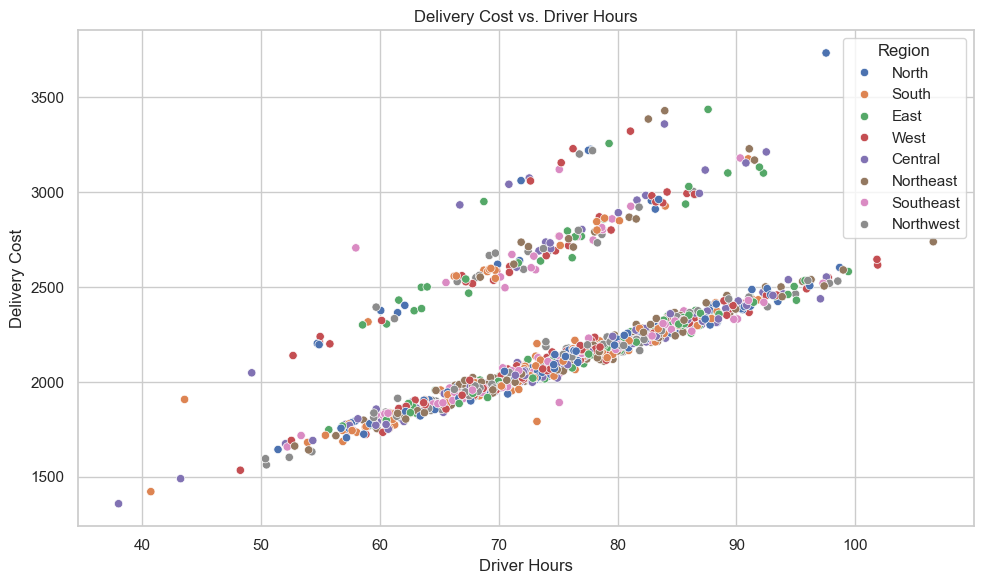

In [27]:
#Check if driver labor is contributing to rising cost:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=logistic_data, x='Driver_Hours', y='Delivery_Cost', hue='Region')
plt.title('Delivery Cost vs. Driver Hours')
plt.xlabel('Driver Hours')
plt.ylabel('Delivery Cost')
plt.tight_layout()
plt.show()



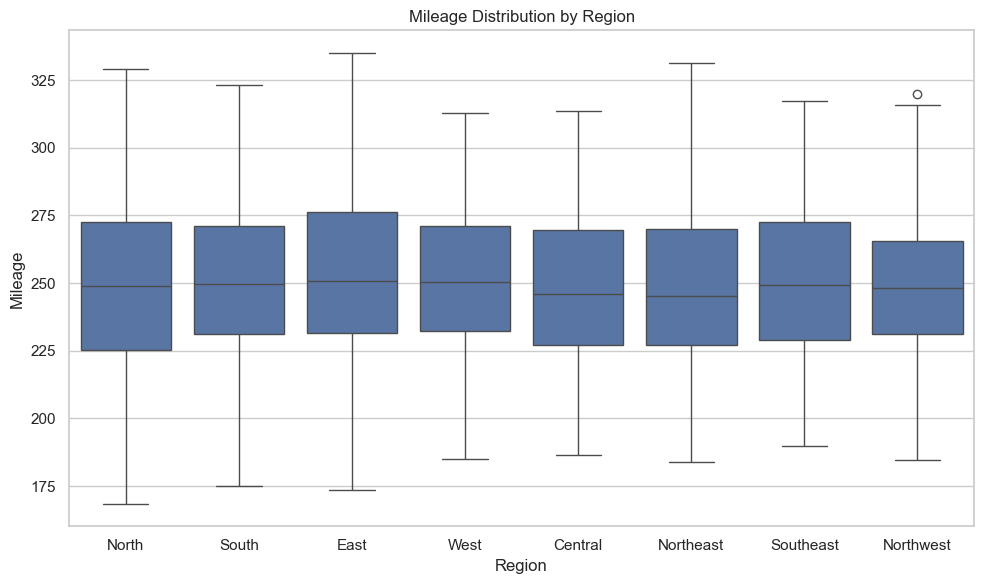

In [28]:
#Detect if regions differ in mileage or operational efficiency
plt.figure(figsize=(10, 6))
sns.boxplot(data=logistic_data, x='Region', y='Mileage')
plt.title('Mileage Distribution by Region')
plt.ylabel('Mileage')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


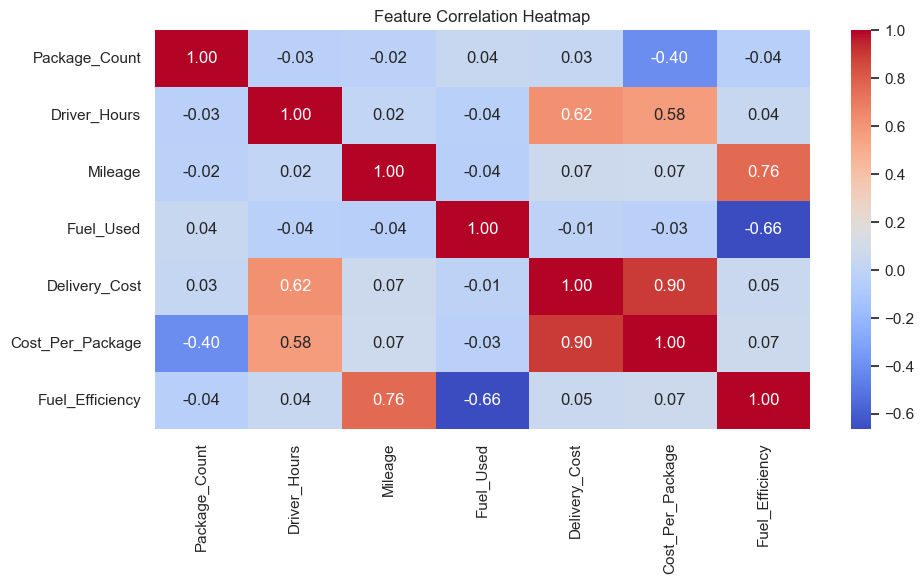

In [29]:
#Identify which features are most associated with rising delivery cost
plt.figure(figsize=(10, 6))
corr = logistic_data[['Package_Count', 'Driver_Hours', 'Mileage', 'Fuel_Used', 
           'Delivery_Cost', 'Cost_Per_Package', 'Fuel_Efficiency']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


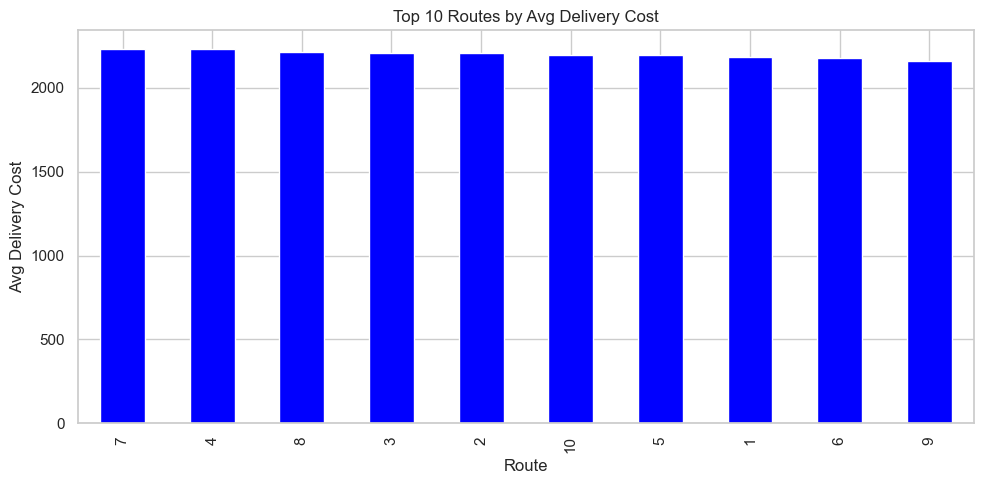

In [30]:
#Investigate which specific routes are contributing most to high cost
top_routes = logistic_data.groupby('Route')['Delivery_Cost'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_routes.plot(kind='bar', color='blue')
plt.title('Top 10 Routes by Avg Delivery Cost')
plt.xlabel('Route')
plt.ylabel('Avg Delivery Cost')
plt.tight_layout()
plt.show()


Machine Learning Model 
Linear Regression

In [31]:
#pd.get_dummies() converts categorical variables like 'Region' and 'Vendor' into binary columns (dummy variables)
linear_logistic=pd.get_dummies(logistic_data,columns=['Region','Vendor'],drop_first=True)
linear_logistic

,Month,Route,Package_Count,Driver_Hours,Mileage,Fuel_Used,Delivery_Cost,Year,Month_Num,Quarter,...,Region_Northwest,Region_South,Region_Southeast,Region_West,Vendor_Vendor B,Vendor_Vendor C,Vendor_Vendor D,Vendor_Vendor E,Vendor_Vendor F,Vendor_Vendor G
0,2023-01-01,1,199,51.444737,269.502297,51.732150,1644.292569,2023,1,1,...,False,False,False,False,True,False,False,False,False,False
1,2023-01-01,2,213,75.901224,225.084631,47.989593,2116.544028,2023,1,1,...,False,False,False,False,False,False,False,False,False,True
2,2023-01-01,3,207,57.952974,279.451740,52.530174,1794.821040,2023,1,1,...,False,False,False,False,False,False,True,False,False,False
3,2023-01-01,4,195,80.282633,218.654911,58.919613,2206.104437,2023,1,1,...,False,False,False,False,False,False,False,False,False,True
4,2023-01-01,5,194,83.177555,213.682364,52.350546,2911.755806,2023,1,1,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2023-06-01,1,214,80.566583,265.835161,51.410402,2246.063959,2023,6,2,...,False,False,False,False,True,False,False,False,False,False
1006,2023-12-01,6,205,71.405929,263.692236,47.261936,2035.619719,2023,12,4,...,False,False,False,False,True,False,False,False,False,False
1007,2023-01-01,8,204,67.797802,265.563157,45.412375,1957.531062,2023,1,1,...,False,False,True,False,False,True,False,False,False,False
1008,2023-11-01,4,216,76.514843,299.781171,42.870562,2162.777239,2023,11,4,...,False,False,False,False,False,True,False,False,False,False


In [32]:
# X: is a independent variables, and used to predict the delivery cost, removed columns like month, route, delivery_cost
X = linear_logistic.drop(columns=['Month', 'Route', 'Delivery_Cost'])
y = linear_logistic['Delivery_Cost']


In [33]:
#imported the liberary sklearn- train the model 80%, test the model 20% 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)




     Package_Count  Driver_Hours     Mileage  Fuel_Used  Year  Month_Num  \
29             210     75.674665  231.905573  44.027312  2023          1   
280            169     97.064690  252.389487  30.816722  2023          4   
585            183     79.242642  278.014313  52.516162  2023          8   
752            213     71.993560  193.001172  48.814280  2023         10   
780            215     71.111902  269.009409  51.167077  2023         10   
..             ...           ...         ...        ...   ...        ...   
106            221     84.049620  243.225798  57.182148  2023          2   
270            209     58.828281  260.389381  46.849758  2023          4   
860            210     75.624868  249.431567  54.265965  2023         11   
435            198     83.810589  255.078051  46.236971  2023          6   
102            214     77.447503  237.493442  50.418497  2023          2   

     Quarter  Fuel_Efficiency  Cost_Per_Package  Packages_per_hour  ...  \
29         1

In [34]:
print(X_test)

     Package_Count  Driver_Hours     Mileage  Fuel_Used  Year  Month_Num  \
629            209     77.678362  257.364960  48.724064  2023          8   
788            181     68.599342  225.700122  55.457800  2023         10   
684            188     72.840696  227.441690  41.224845  2023          9   
516            195     72.104868  229.800534  47.730276  2023          7   
529            187     82.794831  280.068078  47.929678  2023          7   
..             ...           ...         ...        ...   ...        ...   
411            197     88.025978  259.285958  53.508550  2023          6   
334            185     83.916635  221.344612  55.831266  2023          5   
210            190     82.453723  242.712297  52.067177  2023          3   
350            205     79.458389  198.332292  46.397725  2023          5   
78             189     74.160981  238.489472  52.900364  2023          1   

     Quarter  Fuel_Efficiency  Cost_Per_Package  Packages_per_hour  ...  \
629        3

In [35]:
print(y_train)

29     2099.718578
280    2438.677655
585    2183.709910
752    2021.614737
780    2059.644920
          ...     
106    2329.974330
270    1786.848524
860    2139.954190
435    2944.460377
102    2163.701621
Name: Delivery_Cost, Length: 808, dtype: float64


In [36]:
print(y_test)

629    2167.658403
788    1945.280317
684    1998.953477
516    2015.668502
529    2248.226491
          ...     
411    2372.116788
334    2256.133258
210    2235.903367
350    2801.318421
78     2689.068725
Name: Delivery_Cost, Length: 202, dtype: float64


In [37]:
#Imported the liberary sklearn- linearregression model
# trained linear regression model  
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)


LinearRegression()

In [38]:
# Here is predict values 
y_pred_linear = linear_model.predict(X_test)
y_pred_linear

array([2169.05732167, 1936.02369539, 1992.49379938, 2012.438381  ,
       2252.40857172, 1986.75226336, 2064.31499317, 2155.80308414,
       2285.72432088, 2163.26762532, 2596.85954364, 2218.47241666,
       2557.75846655, 2135.81893629, 1909.48185432, 2525.80367823,
       2236.47470785, 1885.9210744 , 3280.57612357, 2496.67179594,
       2390.99220843, 1836.34709283, 2101.87142709, 1836.58455133,
       1698.23559295, 2352.99787949, 2192.99066802, 2190.49652414,
       1772.53091873, 2918.81846773, 1865.38340368, 2163.07470036,
       1876.78705166, 1915.55066453, 1941.61275289, 2784.05369318,
       2139.93993401, 2922.59913962, 2080.66165849, 2545.20223665,
       2354.73263022, 1838.26445905, 2052.23158386, 1980.36707819,
       1770.02971303, 3358.64506004, 1720.95973695, 2677.55344944,
       2125.19789436, 2508.63563409, 3132.81507398, 2509.71879178,
       1965.64654457, 2177.8067742 , 2211.88574669, 2478.86316195,
       1895.61156902, 2010.64179978, 3202.28923925, 2077.15257

In [39]:
#Evaluate the model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('r2_score',r2_score(y_test, y_pred_linear))
print('rmse' ,np.sqrt(mean_squared_error(y_test, y_pred_linear)))
print('mse',mean_absolute_error(y_test,y_pred_linear))
print('mae',mean_absolute_error(y_test,y_pred_linear))



r2_score 0.9950497905311747
rmse 25.357594920160683
mse 16.664713223996966
mae 16.664713223996966


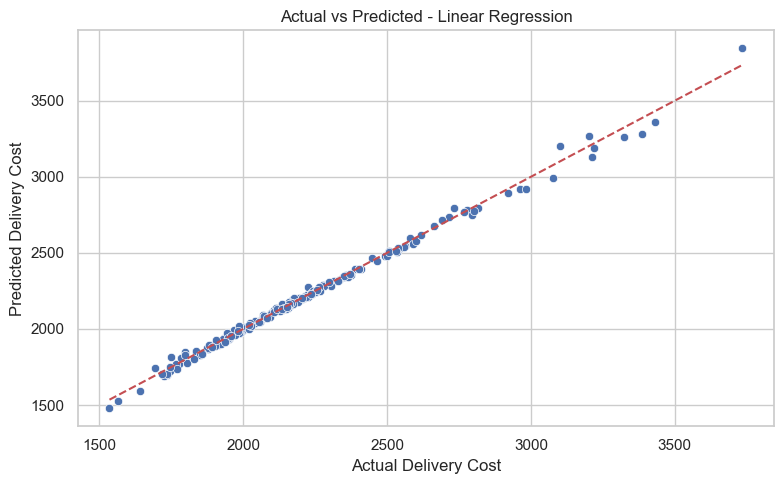

In [40]:

# visualization of predictions
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_linear)
plt.xlabel("Actual Delivery Cost")
plt.ylabel("Predicted Delivery Cost")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()


 # XGBOOST Machine learning model

In [41]:
from xgboost import XGBRegressor

In [42]:
#Imported the liberary XGBRegression model
# trained linear regression model 

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [43]:
y_xgboostpredict = xgb_model.predict(X_test)
y_xgboostpredict

array([2181.1023, 1957.809 , 2021.0942, 2011.6296, 2229.797 , 2005.1027,
       2069.017 , 2125.9421, 2262.7986, 2174.96  , 2597.4268, 2233.4453,
       2573.349 , 2131.601 , 1937.0336, 2461.615 , 2220.3533, 2079.815 ,
       3187.217 , 2467.3806, 2429.4429, 1860.9066, 2099.773 , 1866.0652,
       1738.0175, 2362.7783, 2197.1746, 2166.4023, 1790.4711, 2863.2188,
       1893.1727, 2167.4453, 1864.188 , 1922.6694, 1945.7715, 2680.1143,
       2160.8672, 2928.887 , 2093.8577, 2487.1106, 2360.1375, 1823.6912,
       2025.3853, 1975.4375, 1768.7559, 3347.5557, 1724.6641, 2604.1577,
       2158.277 , 2520.6614, 3158.2637, 2515.9692, 1954.0214, 2191.3486,
       2253.793 , 2544.8318, 1922.2574, 2047.4547, 3290.1375, 2103.375 ,
       2052.9822, 1995.2638, 1848.0892, 2064.9597, 2356.0986, 2008.7812,
       2791.2913, 2128.9065, 2753.2964, 2112.0925, 1920.7045, 2200.2483,
       2086.5784, 2511.89  , 2211.0461, 2195.8599, 2043.8668, 2070.3755,
       2119.9368, 2294.6243, 2077.7744, 2178.5518, 

In [44]:
#Evaluate the model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('r2_score',r2_score(y_test, y_xgboostpredict))
print('rmse' ,np.sqrt(mean_squared_error(y_test, y_xgboostpredict)))
print('mse',mean_absolute_error(y_test,y_xgboostpredict))
print('mae',mean_absolute_error(y_test,y_xgboostpredict))

r2_score 0.9775108077026357
rmse 54.04844461895449
mse 24.199679662213683
mae 24.199679662213683


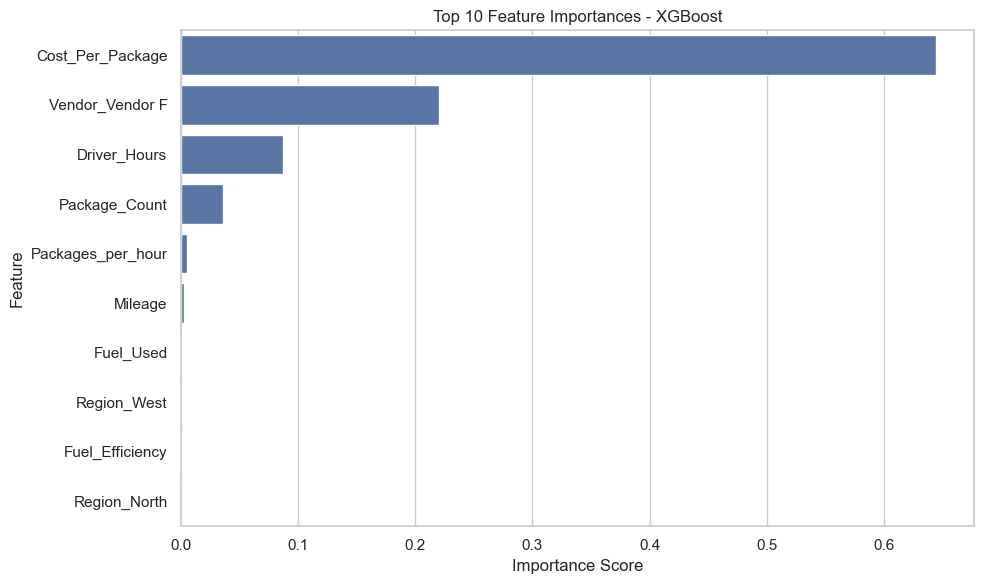

In [45]:
importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance.values[:10], y=importance.index[:10])
plt.title("Top 10 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


As per my analysis here is the conclusions we get from the dataset

Cost is increasing steadily month-over-month

Mileage, driver hours, and vendor choice are strongly influencing cost.

XGBoost shows high impact of Driver_Hours, Fuel_Used, and Region on delivery costs.

Targeted optimization of top routes and vendors can improve cost efficiency.